# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [81]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [82]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

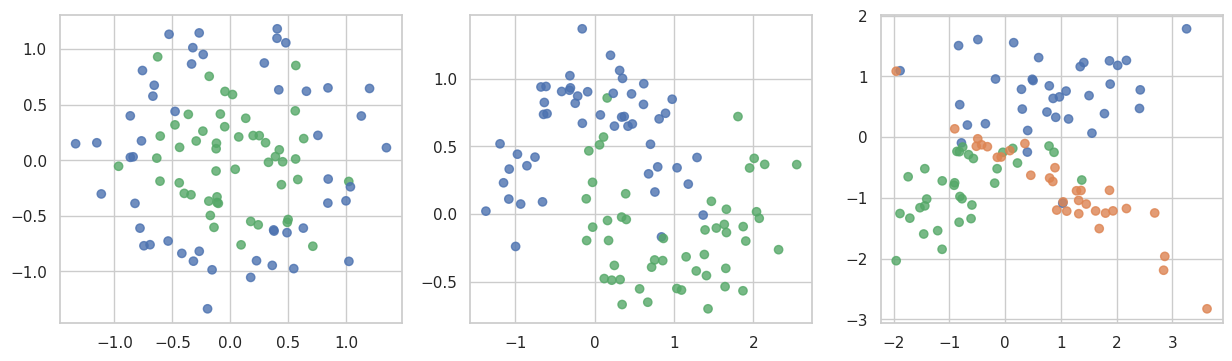

In [83]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [84]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

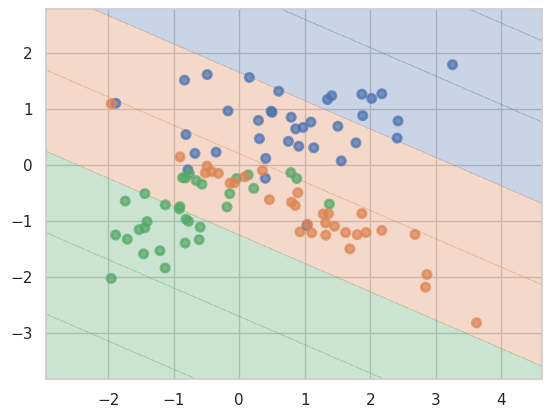

In [85]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [86]:
from sklearn.metrics import accuracy_score

Dataset number: 1
Accuracy on train: 1.0
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 1.0
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 1.0
Accuracy on test: 0.7



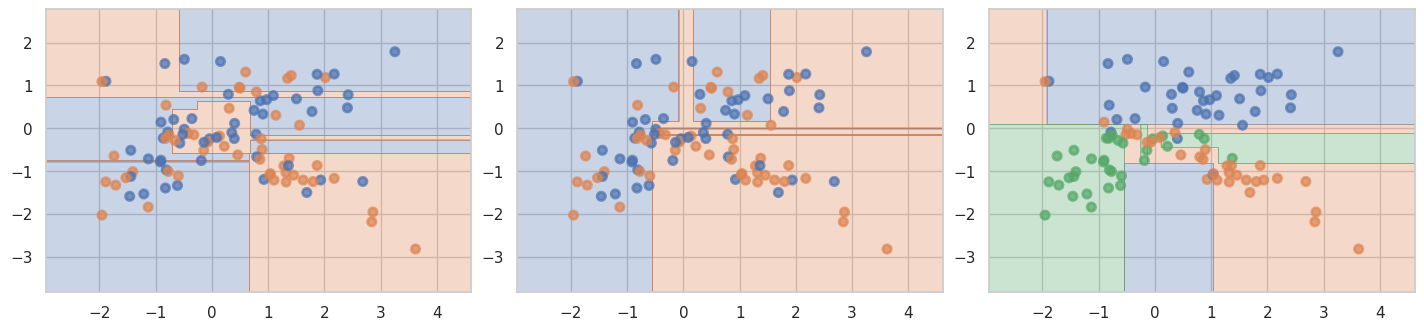

In [87]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    dec_tree  = DecisionTreeClassifier().fit(X_train, y_train)

    plt.subplot(1, 3, i + 1)
    plot_surface(dec_tree, X, y)

    train_acc = accuracy_score(y_train, dec_tree.predict(X_train))
    test_acc = accuracy_score(y_test, dec_tree.predict(X_test))

    print(f'Dataset number: {i + 1}\nAccuracy on train: {train_acc}\nAccuracy on test: {test_acc}\n')

__Ответ:__ Модели явно переробучились, ошибка сильно больше на тестовых данных (1 и 3) и также пространство сильно "изрезанно" разными предсказанями классов (из-за `accurancy = 1` на `train`).

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Max depth: 2 Min samples per leaf: 9

Dataset number: 1
Accuracy on train: 0.8
Accuracy on test: 0.65

Dataset number: 2
Accuracy on train: 0.825
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.75


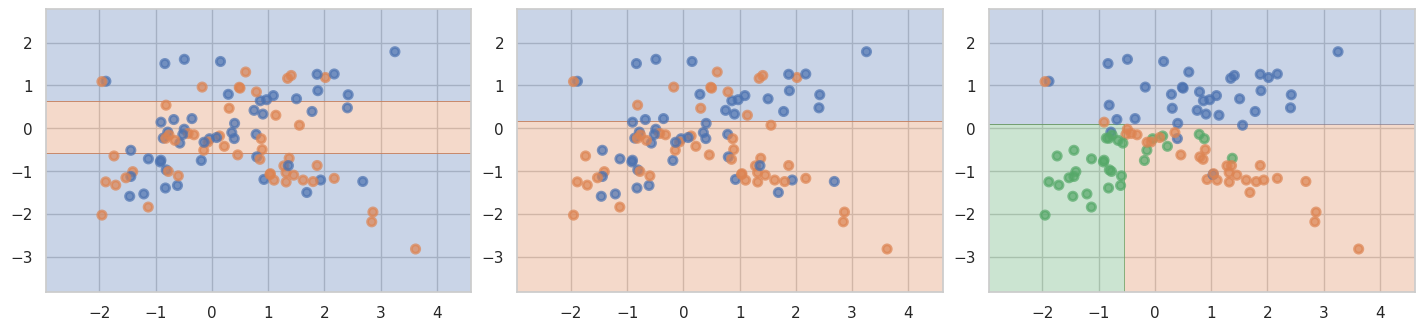

Max depth: 2 Min samples per leaf: 7

Dataset number: 1
Accuracy on train: 0.8
Accuracy on test: 0.65

Dataset number: 2
Accuracy on train: 0.8625
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.75


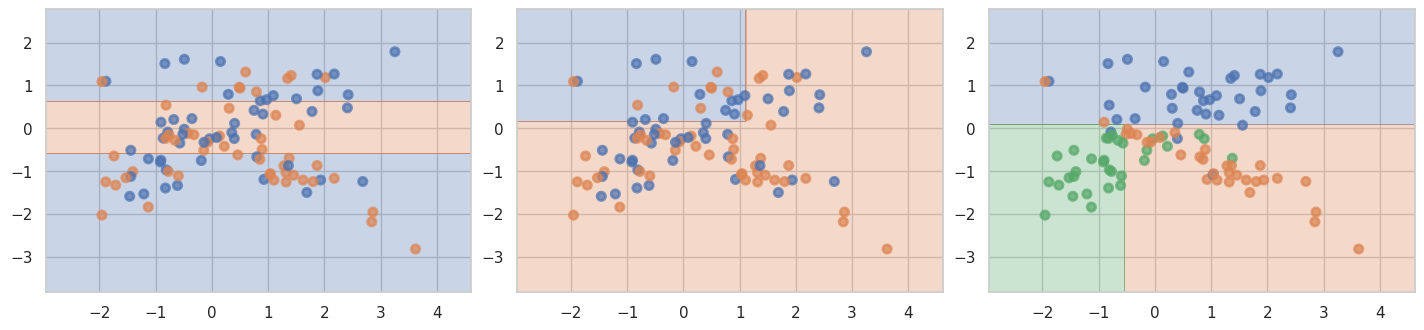

Max depth: 2 Min samples per leaf: 5

Dataset number: 1
Accuracy on train: 0.8
Accuracy on test: 0.65

Dataset number: 2
Accuracy on train: 0.8875
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.75


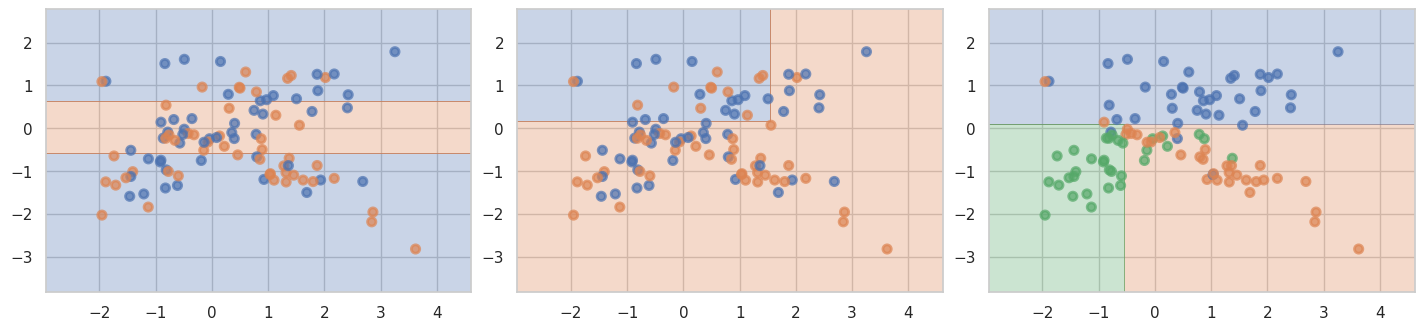

Max depth: 2 Min samples per leaf: 3

Dataset number: 1
Accuracy on train: 0.8
Accuracy on test: 0.65

Dataset number: 2
Accuracy on train: 0.9
Accuracy on test: 1.0

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.7999999999999999


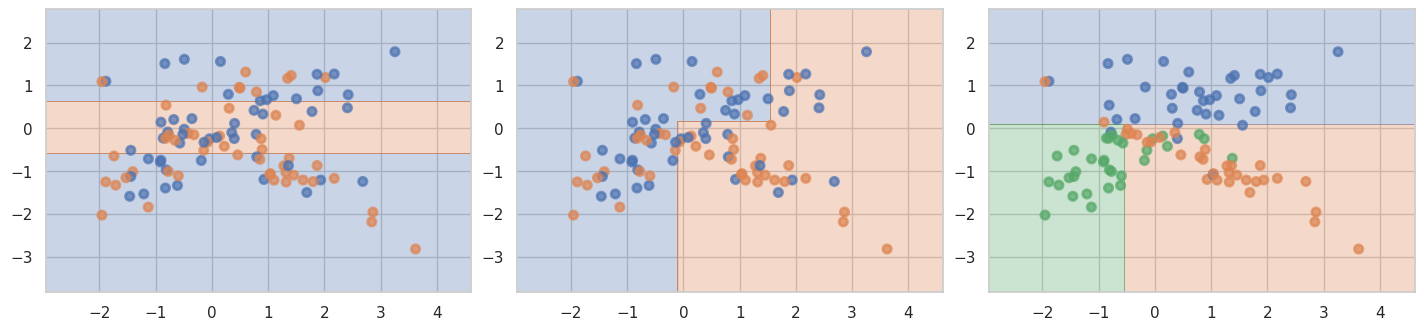

Max depth: 2 Min samples per leaf: 1

Dataset number: 1
Accuracy on train: 0.8125
Accuracy on test: 0.6

Dataset number: 2
Accuracy on train: 0.9125
Accuracy on test: 1.0

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.75

Average accurancy on test: 0.7833333333333333


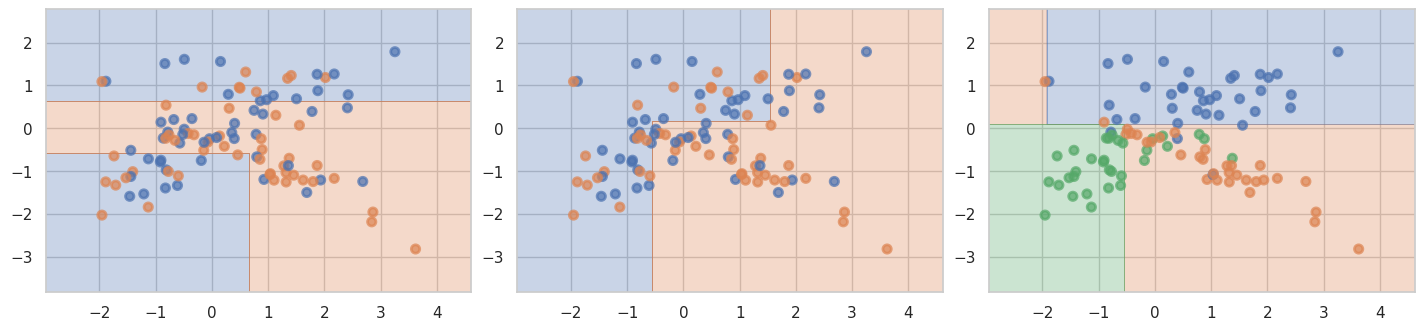

Max depth: 3 Min samples per leaf: 9

Dataset number: 1
Accuracy on train: 0.825
Accuracy on test: 0.8

Dataset number: 2
Accuracy on train: 0.8375
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.7999999999999999


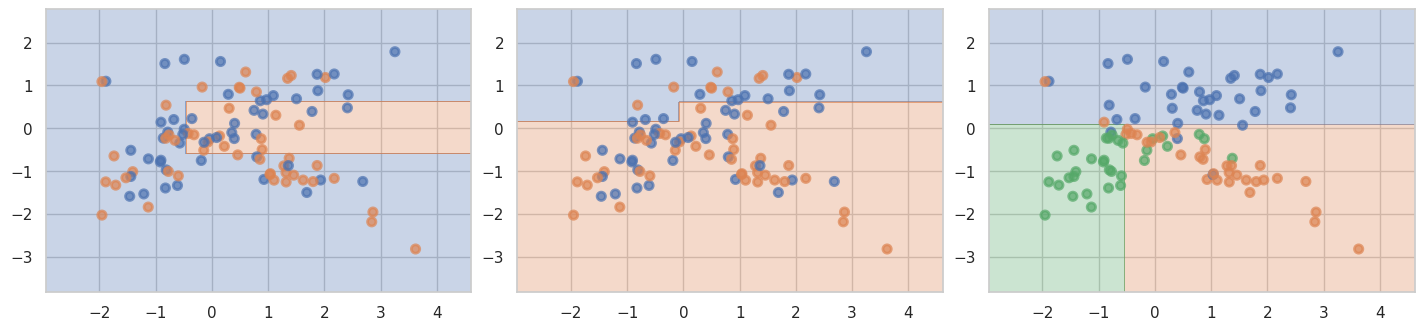

Max depth: 3 Min samples per leaf: 7

Dataset number: 1
Accuracy on train: 0.8375
Accuracy on test: 0.8

Dataset number: 2
Accuracy on train: 0.8625
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.7999999999999999


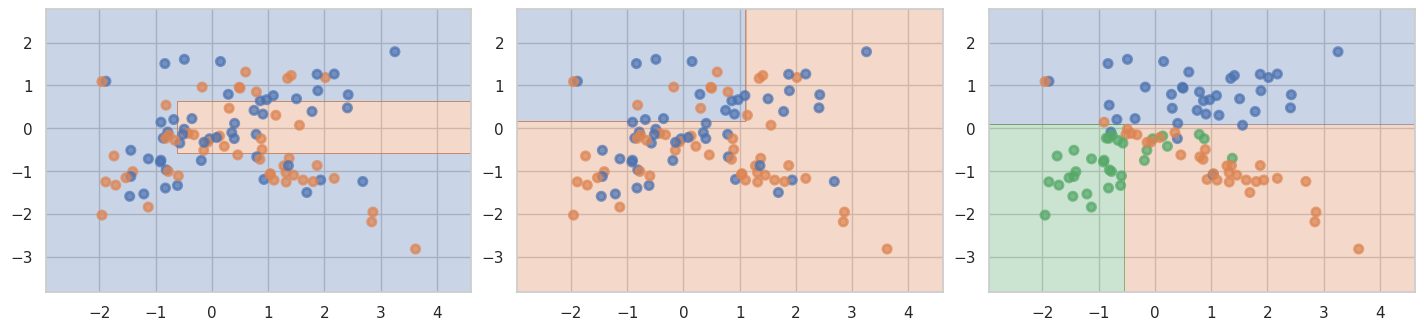

Max depth: 3 Min samples per leaf: 5

Dataset number: 1
Accuracy on train: 0.8625
Accuracy on test: 0.75

Dataset number: 2
Accuracy on train: 0.8875
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.7833333333333333


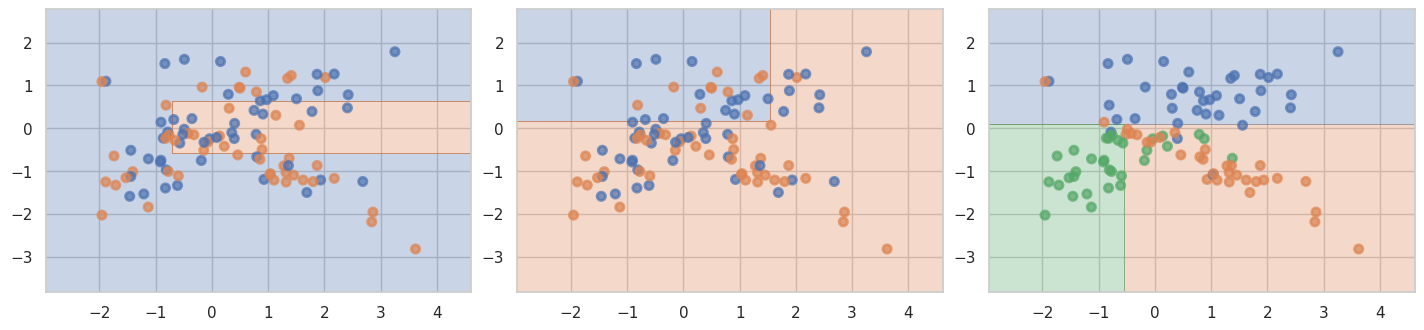

Max depth: 3 Min samples per leaf: 3

Dataset number: 1
Accuracy on train: 0.875
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 0.9
Accuracy on test: 1.0

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.8166666666666668


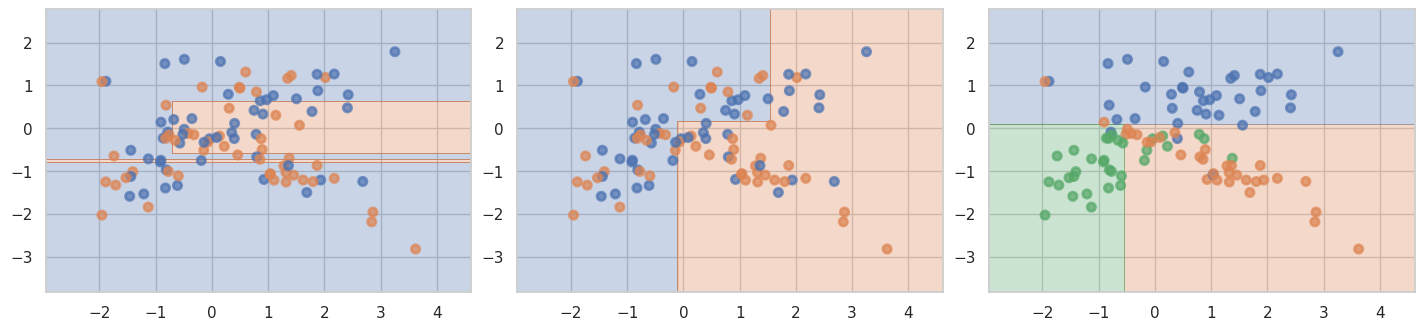

Max depth: 3 Min samples per leaf: 1

Dataset number: 1
Accuracy on train: 0.875
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 0.9125
Accuracy on test: 1.0

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.75

Average accurancy on test: 0.8166666666666668


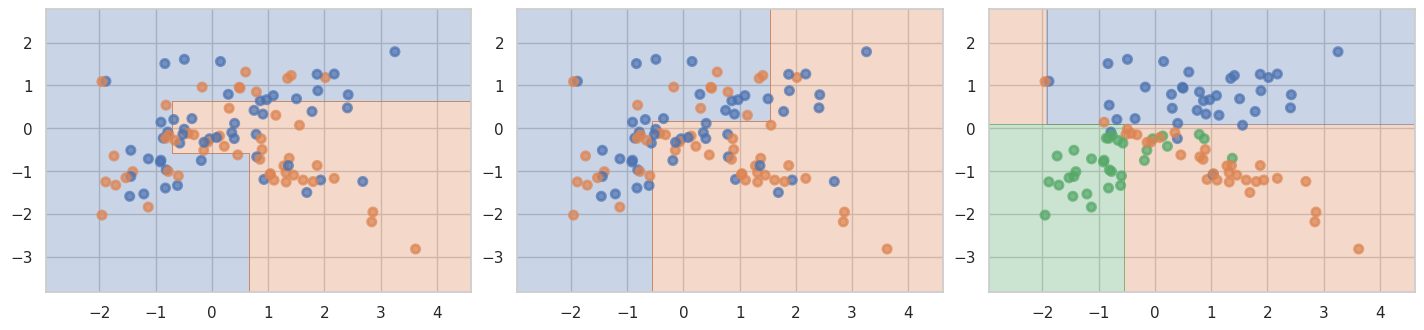

Max depth: 5 Min samples per leaf: 9

Dataset number: 1
Accuracy on train: 0.8375
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.8375
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.8333333333333334


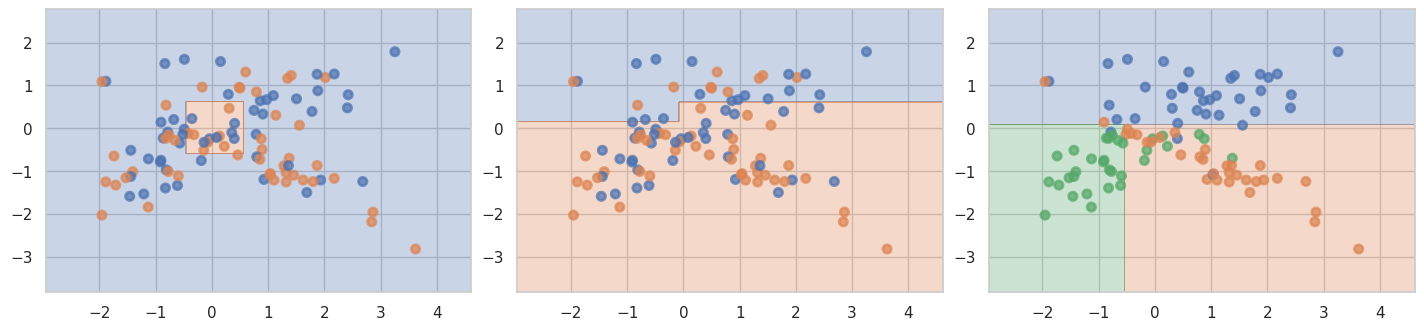

Max depth: 5 Min samples per leaf: 7

Dataset number: 1
Accuracy on train: 0.875
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.9
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.8000000000000002


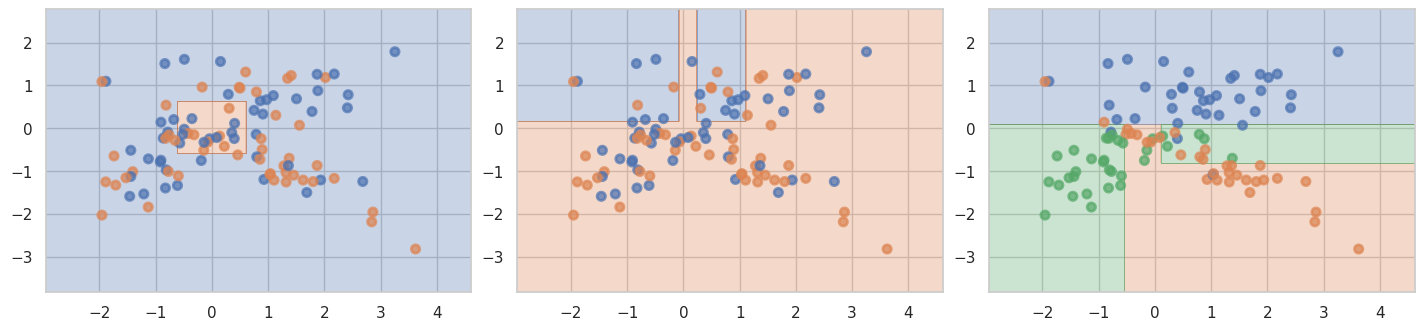

Max depth: 5 Min samples per leaf: 5

Dataset number: 1
Accuracy on train: 0.9125
Accuracy on test: 0.85

Dataset number: 2
Accuracy on train: 0.95
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.7833333333333332


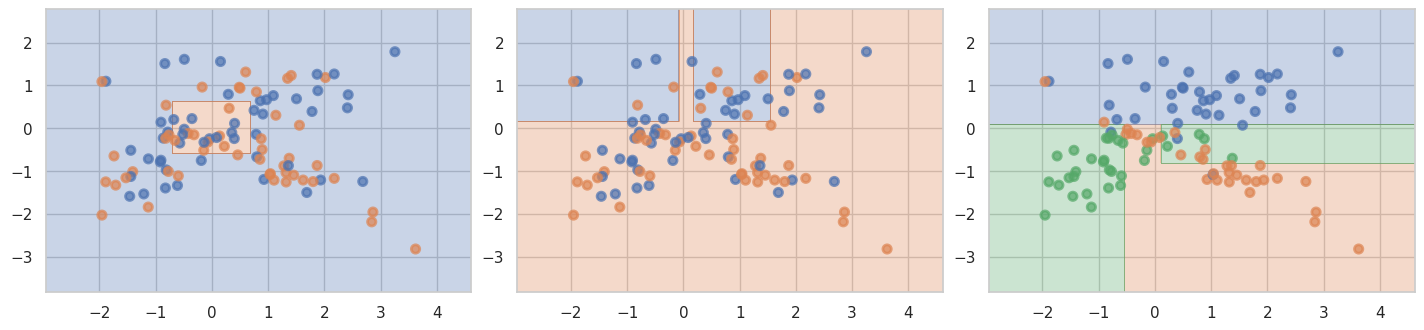

Max depth: 5 Min samples per leaf: 3

Dataset number: 1
Accuracy on train: 0.925
Accuracy on test: 0.75

Dataset number: 2
Accuracy on train: 0.9625
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.75

Average accurancy on test: 0.8166666666666668


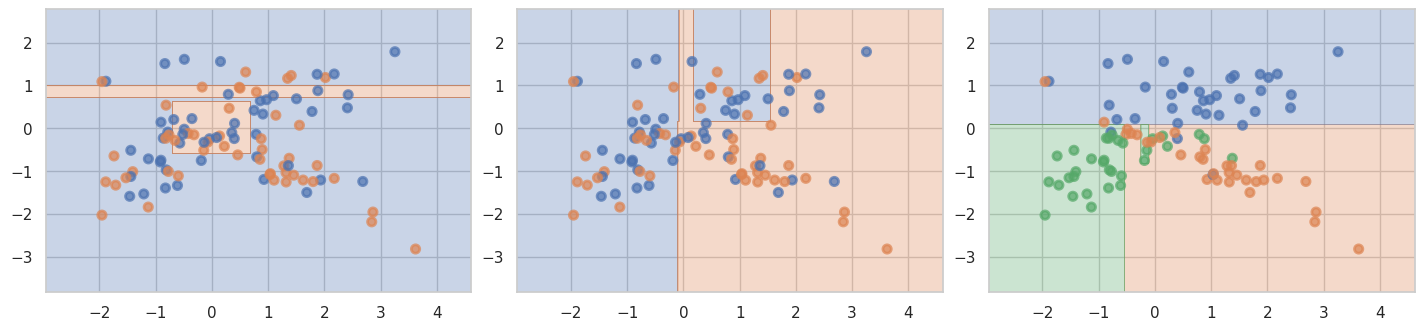

Max depth: 5 Min samples per leaf: 1

Dataset number: 1
Accuracy on train: 0.975
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 0.9875
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.9375
Accuracy on test: 0.7

Average accurancy on test: 0.7833333333333332


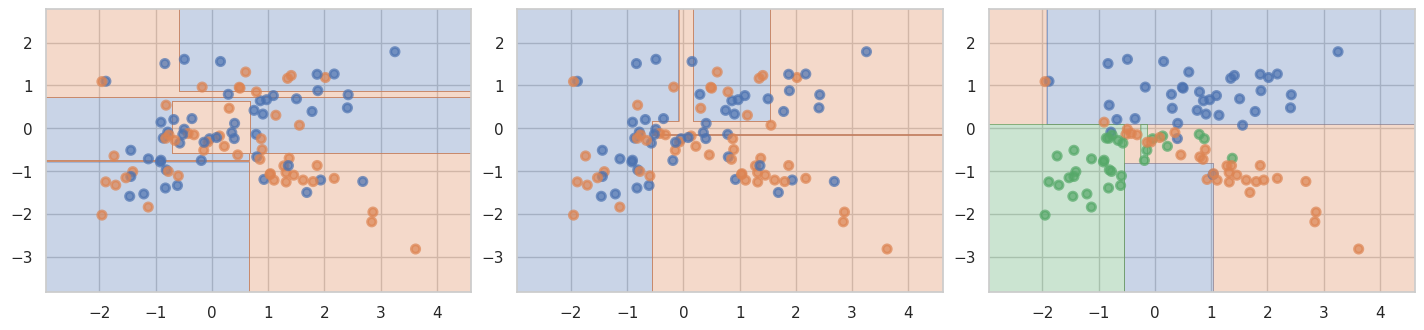

Max depth: 6 Min samples per leaf: 9

Dataset number: 1
Accuracy on train: 0.8375
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.8375
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.8333333333333334


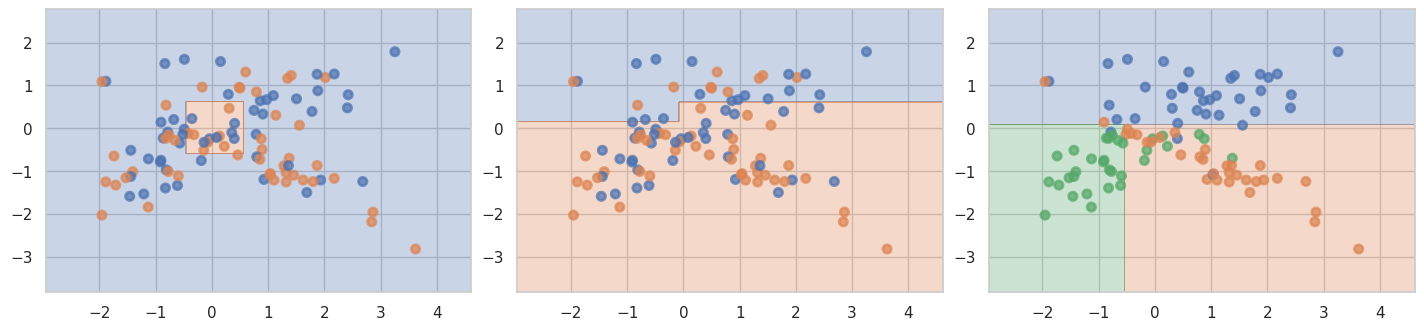

Max depth: 6 Min samples per leaf: 7

Dataset number: 1
Accuracy on train: 0.875
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.9
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.8000000000000002


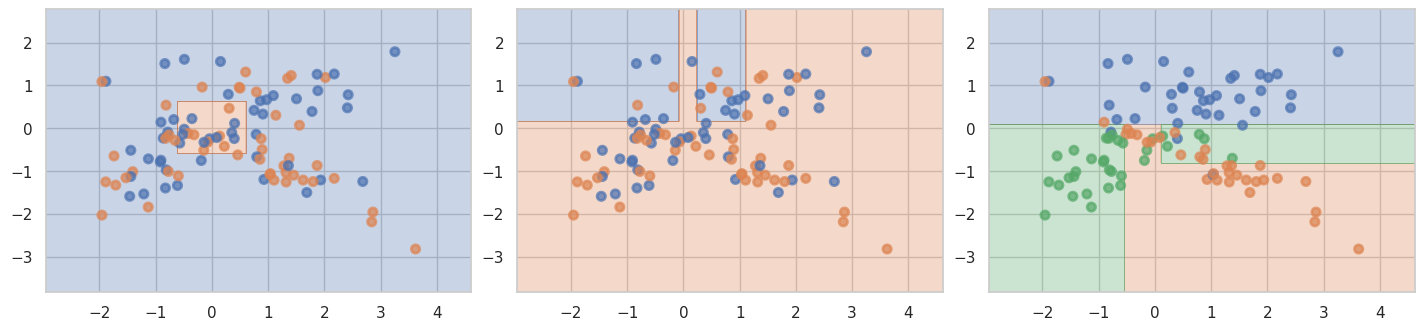

Max depth: 6 Min samples per leaf: 5

Dataset number: 1
Accuracy on train: 0.9125
Accuracy on test: 0.85

Dataset number: 2
Accuracy on train: 0.95
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.7833333333333332


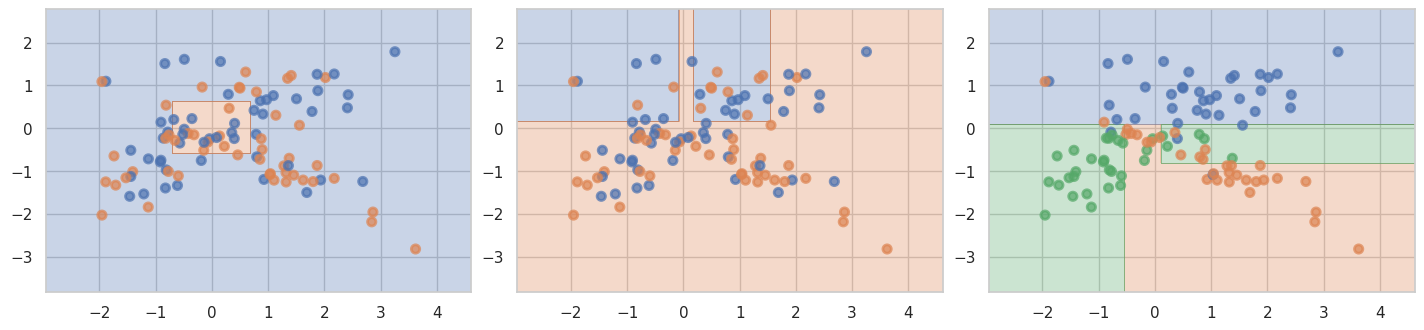

Max depth: 6 Min samples per leaf: 3

Dataset number: 1
Accuracy on train: 0.9375
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 0.9625
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.9125
Accuracy on test: 0.8

Average accurancy on test: 0.8166666666666668


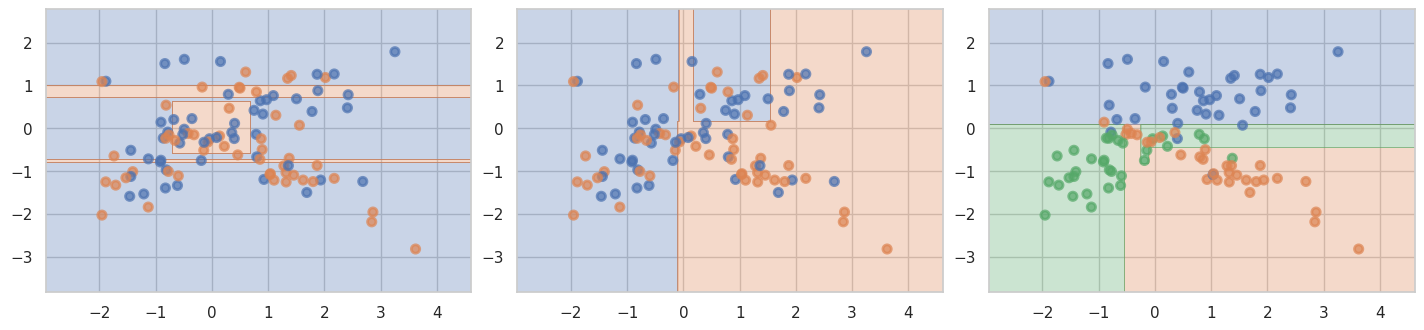

Max depth: 6 Min samples per leaf: 1

Dataset number: 1
Accuracy on train: 1.0
Accuracy on test: 0.65

Dataset number: 2
Accuracy on train: 1.0
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.95
Accuracy on test: 0.65

Average accurancy on test: 0.75


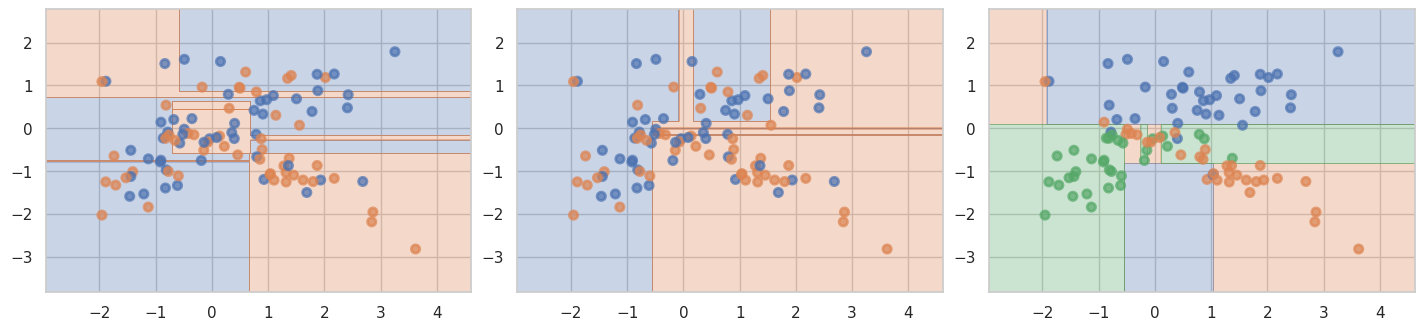

Max depth: 7 Min samples per leaf: 9

Dataset number: 1
Accuracy on train: 0.8375
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.8375
Accuracy on test: 0.85

Dataset number: 3
Accuracy on train: 0.8875
Accuracy on test: 0.75

Average accurancy on test: 0.8333333333333334


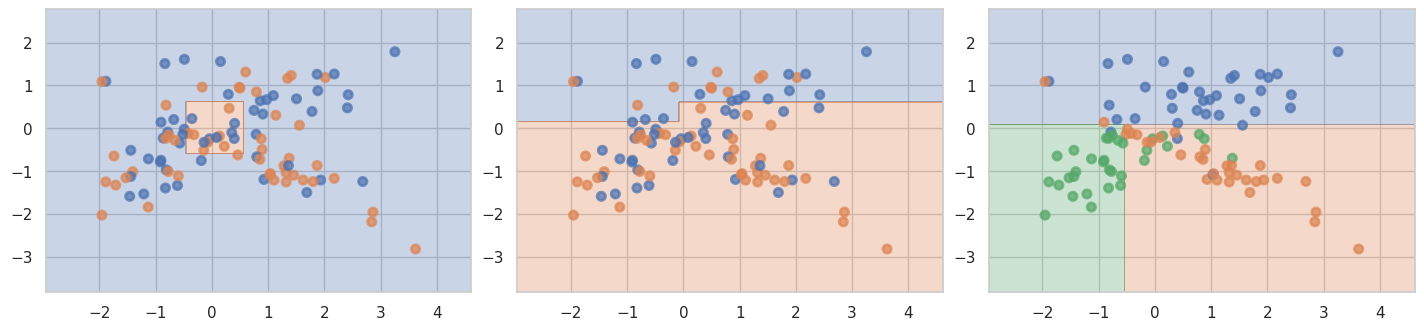

Max depth: 7 Min samples per leaf: 7

Dataset number: 1
Accuracy on train: 0.875
Accuracy on test: 0.9

Dataset number: 2
Accuracy on train: 0.9
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.8000000000000002


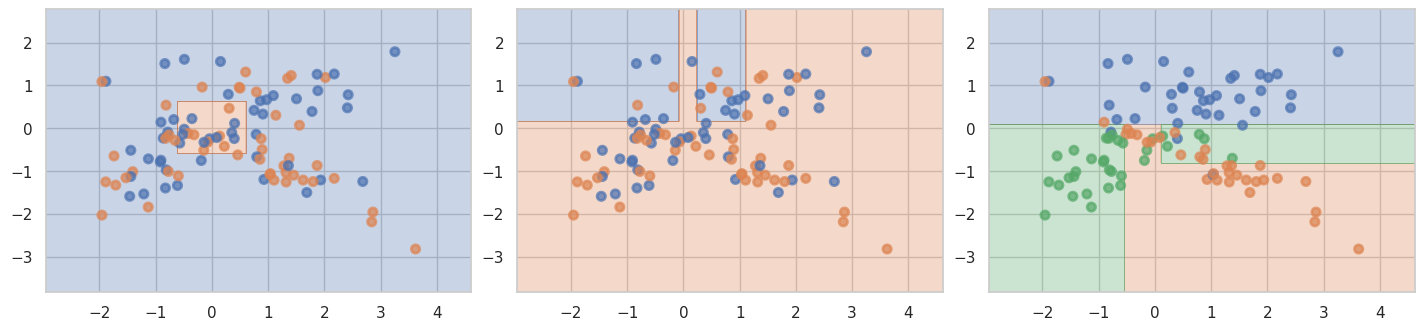

Max depth: 7 Min samples per leaf: 5

Dataset number: 1
Accuracy on train: 0.9125
Accuracy on test: 0.85

Dataset number: 2
Accuracy on train: 0.95
Accuracy on test: 0.8

Dataset number: 3
Accuracy on train: 0.9
Accuracy on test: 0.7

Average accurancy on test: 0.7833333333333332


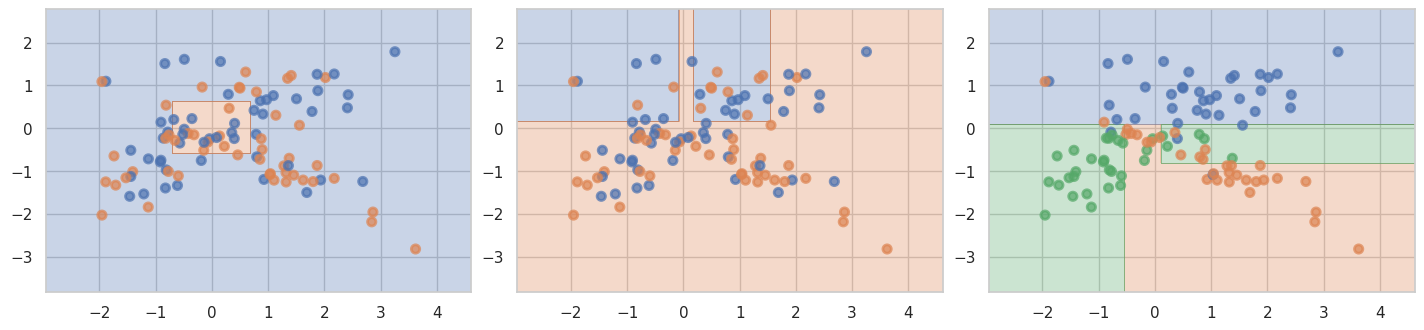

Max depth: 7 Min samples per leaf: 3

Dataset number: 1
Accuracy on train: 0.925
Accuracy on test: 0.75

Dataset number: 2
Accuracy on train: 0.9625
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.925
Accuracy on test: 0.7

Average accurancy on test: 0.7999999999999999


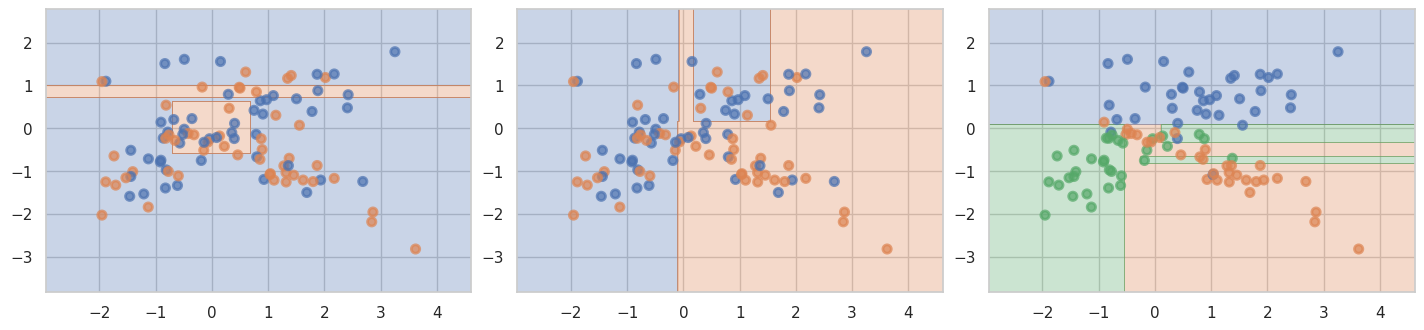

Max depth: 7 Min samples per leaf: 1

Dataset number: 1
Accuracy on train: 1.0
Accuracy on test: 0.7

Dataset number: 2
Accuracy on train: 1.0
Accuracy on test: 0.95

Dataset number: 3
Accuracy on train: 0.975
Accuracy on test: 0.7

Average accurancy on test: 0.7833333333333332


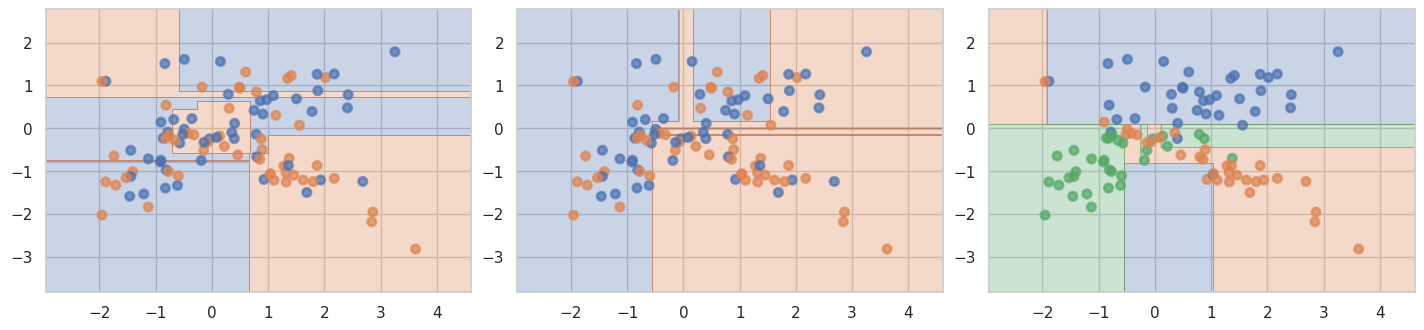

In [88]:
# batch_sizes = np.arange(5, 500, 10) np.logspace(0, 10, 4)

depthes = [2, 3, 5, 6, 7]
samples = [1, 3, 5, 7, 9][::-1]

splits = []
for i, (x, y) in enumerate(datasets):
  splits.append(train_test_split(x, y, test_size=0.2, random_state=42))

for max_depth in depthes:
    for min_samples_leaf in samples:

      print(f"Max depth: {max_depth} Min samples per leaf: {min_samples_leaf}\n")

      sum_acc_on_test = 0

      plt.figure(figsize=(15, 4))
      for i, (x, y) in enumerate(datasets):
          X_train, X_test, y_train, y_test = splits[i]
          dec_tree  = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

          plt.subplot(1, 3, i + 1)
          plot_surface(dec_tree, X, y)

          train_acc = accuracy_score(y_train, dec_tree.predict(X_train))
          test_acc = accuracy_score(y_test, dec_tree.predict(X_test))

          sum_acc_on_test += test_acc

          print(f'Dataset number: {i + 1}\nAccuracy on train: {train_acc}\nAccuracy on test: {test_acc}\n')
      print(f'Average accurancy on test: {sum_acc_on_test / 3}')
      plt.show()

__Ответ:__ При увеличении глубины и уменьшении минимального порога листа проглядываются признаки переобучения на всех датасетах. И хорошее разбиение получается при ограничении максимальной глубины (`max_depth`) в 3. А лучшие показатели средней ошибки на тесте получаются при `Max depth: 5,6,7 Min samples per leaf: 9` Когда нет параметра сильно "обрезающего" дерева, но и оба параметра не дают модели получать много листьев подобранных на тесте.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Посылка: https://contest.yandex.ru/contest/56884/run-report/103014680/

Ник: Георгий

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [89]:
from hw5code import find_best_split

In [90]:
!wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/students.csv
df = pd.read_csv('students.csv')

--2023-12-15 20:46:07--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7249 (7.1K) [text/plain]
Saving to: ‘students.csv.3’

students.csv.3      100%[===================>]   7.08K  --.-KB/s    in 0s      

2023-12-15 20:46:08 (23.2 MB/s) - ‘students.csv.3’ saved [7249/7249]



In [91]:
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [92]:
fatures = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

In [93]:
y = df['UNS']
X = df.drop('UNS', axis=1)

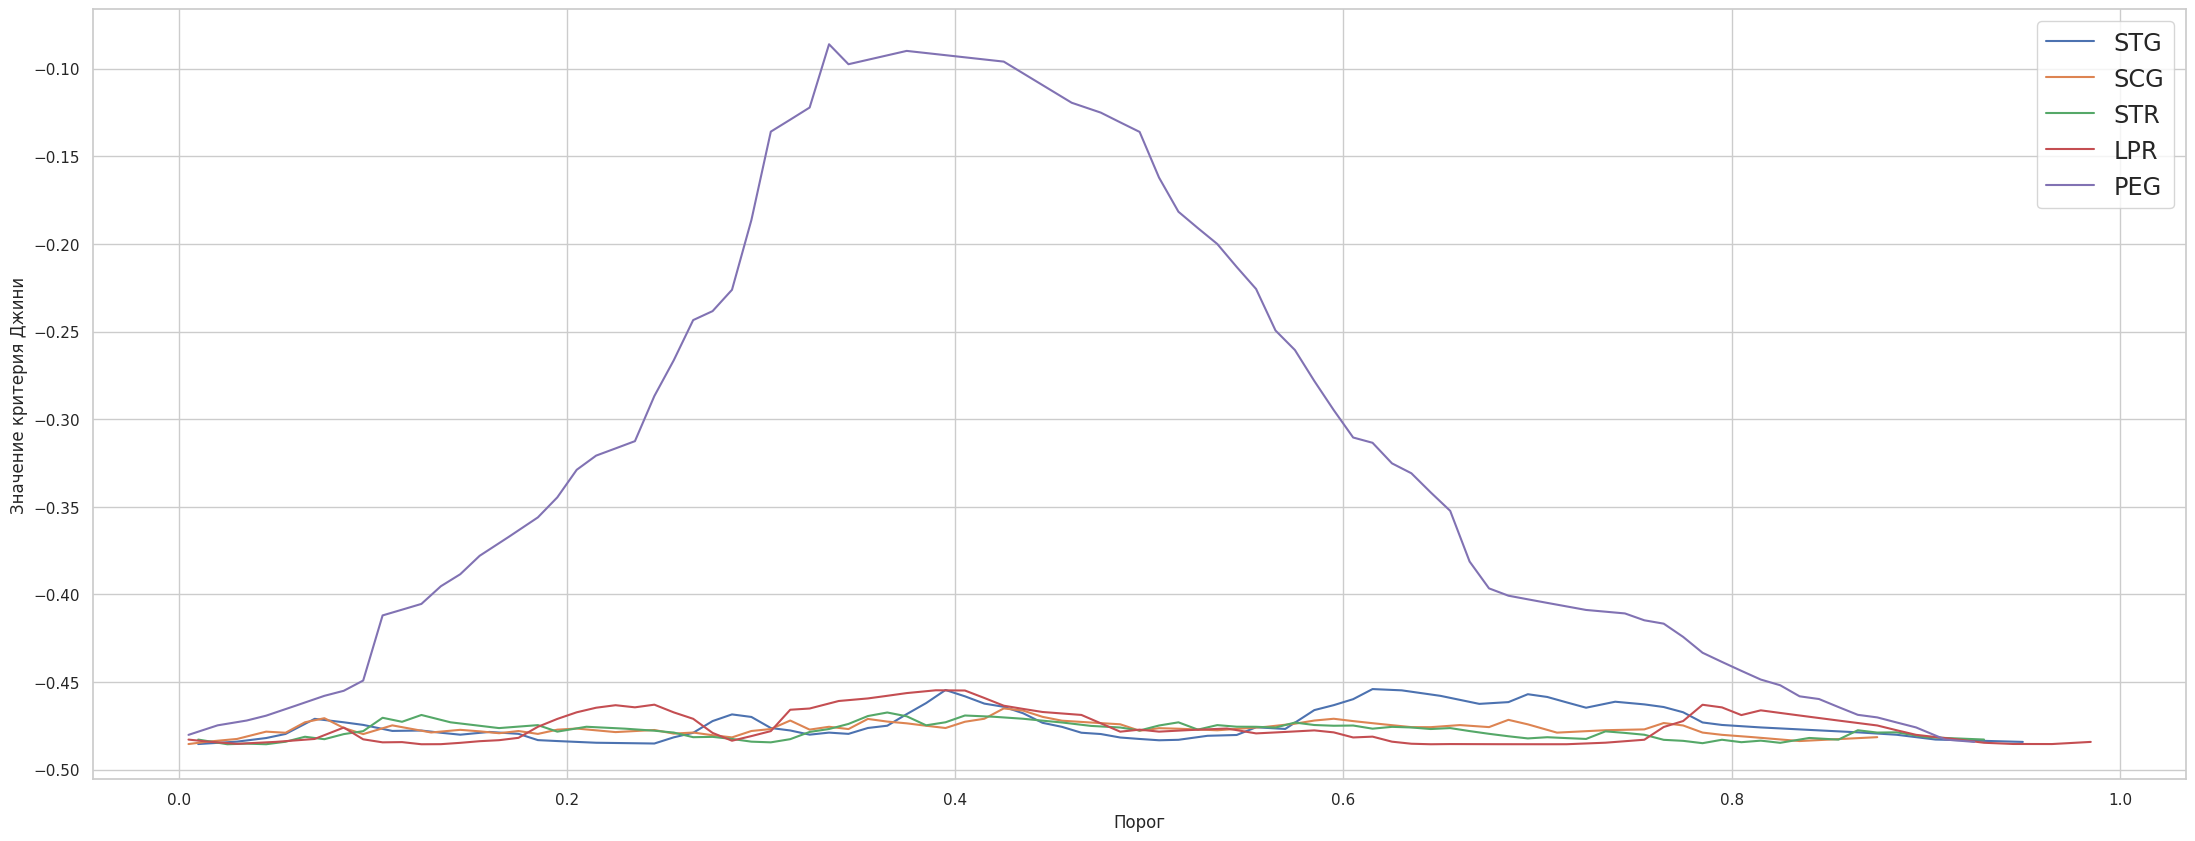

In [94]:
fig, ax = plt.subplots(figsize=(27, 10))

for feature in (fatures):
  thresholds, ginis, threshold_best, gini_best = find_best_split(X[feature].to_numpy(), y.to_numpy())
  ax.plot(thresholds, ginis, label=feature)

ax.set(xlabel='Порог', ylabel='Значение критерия Джини')
ax.legend(fontsize="x-large")

plt.show()

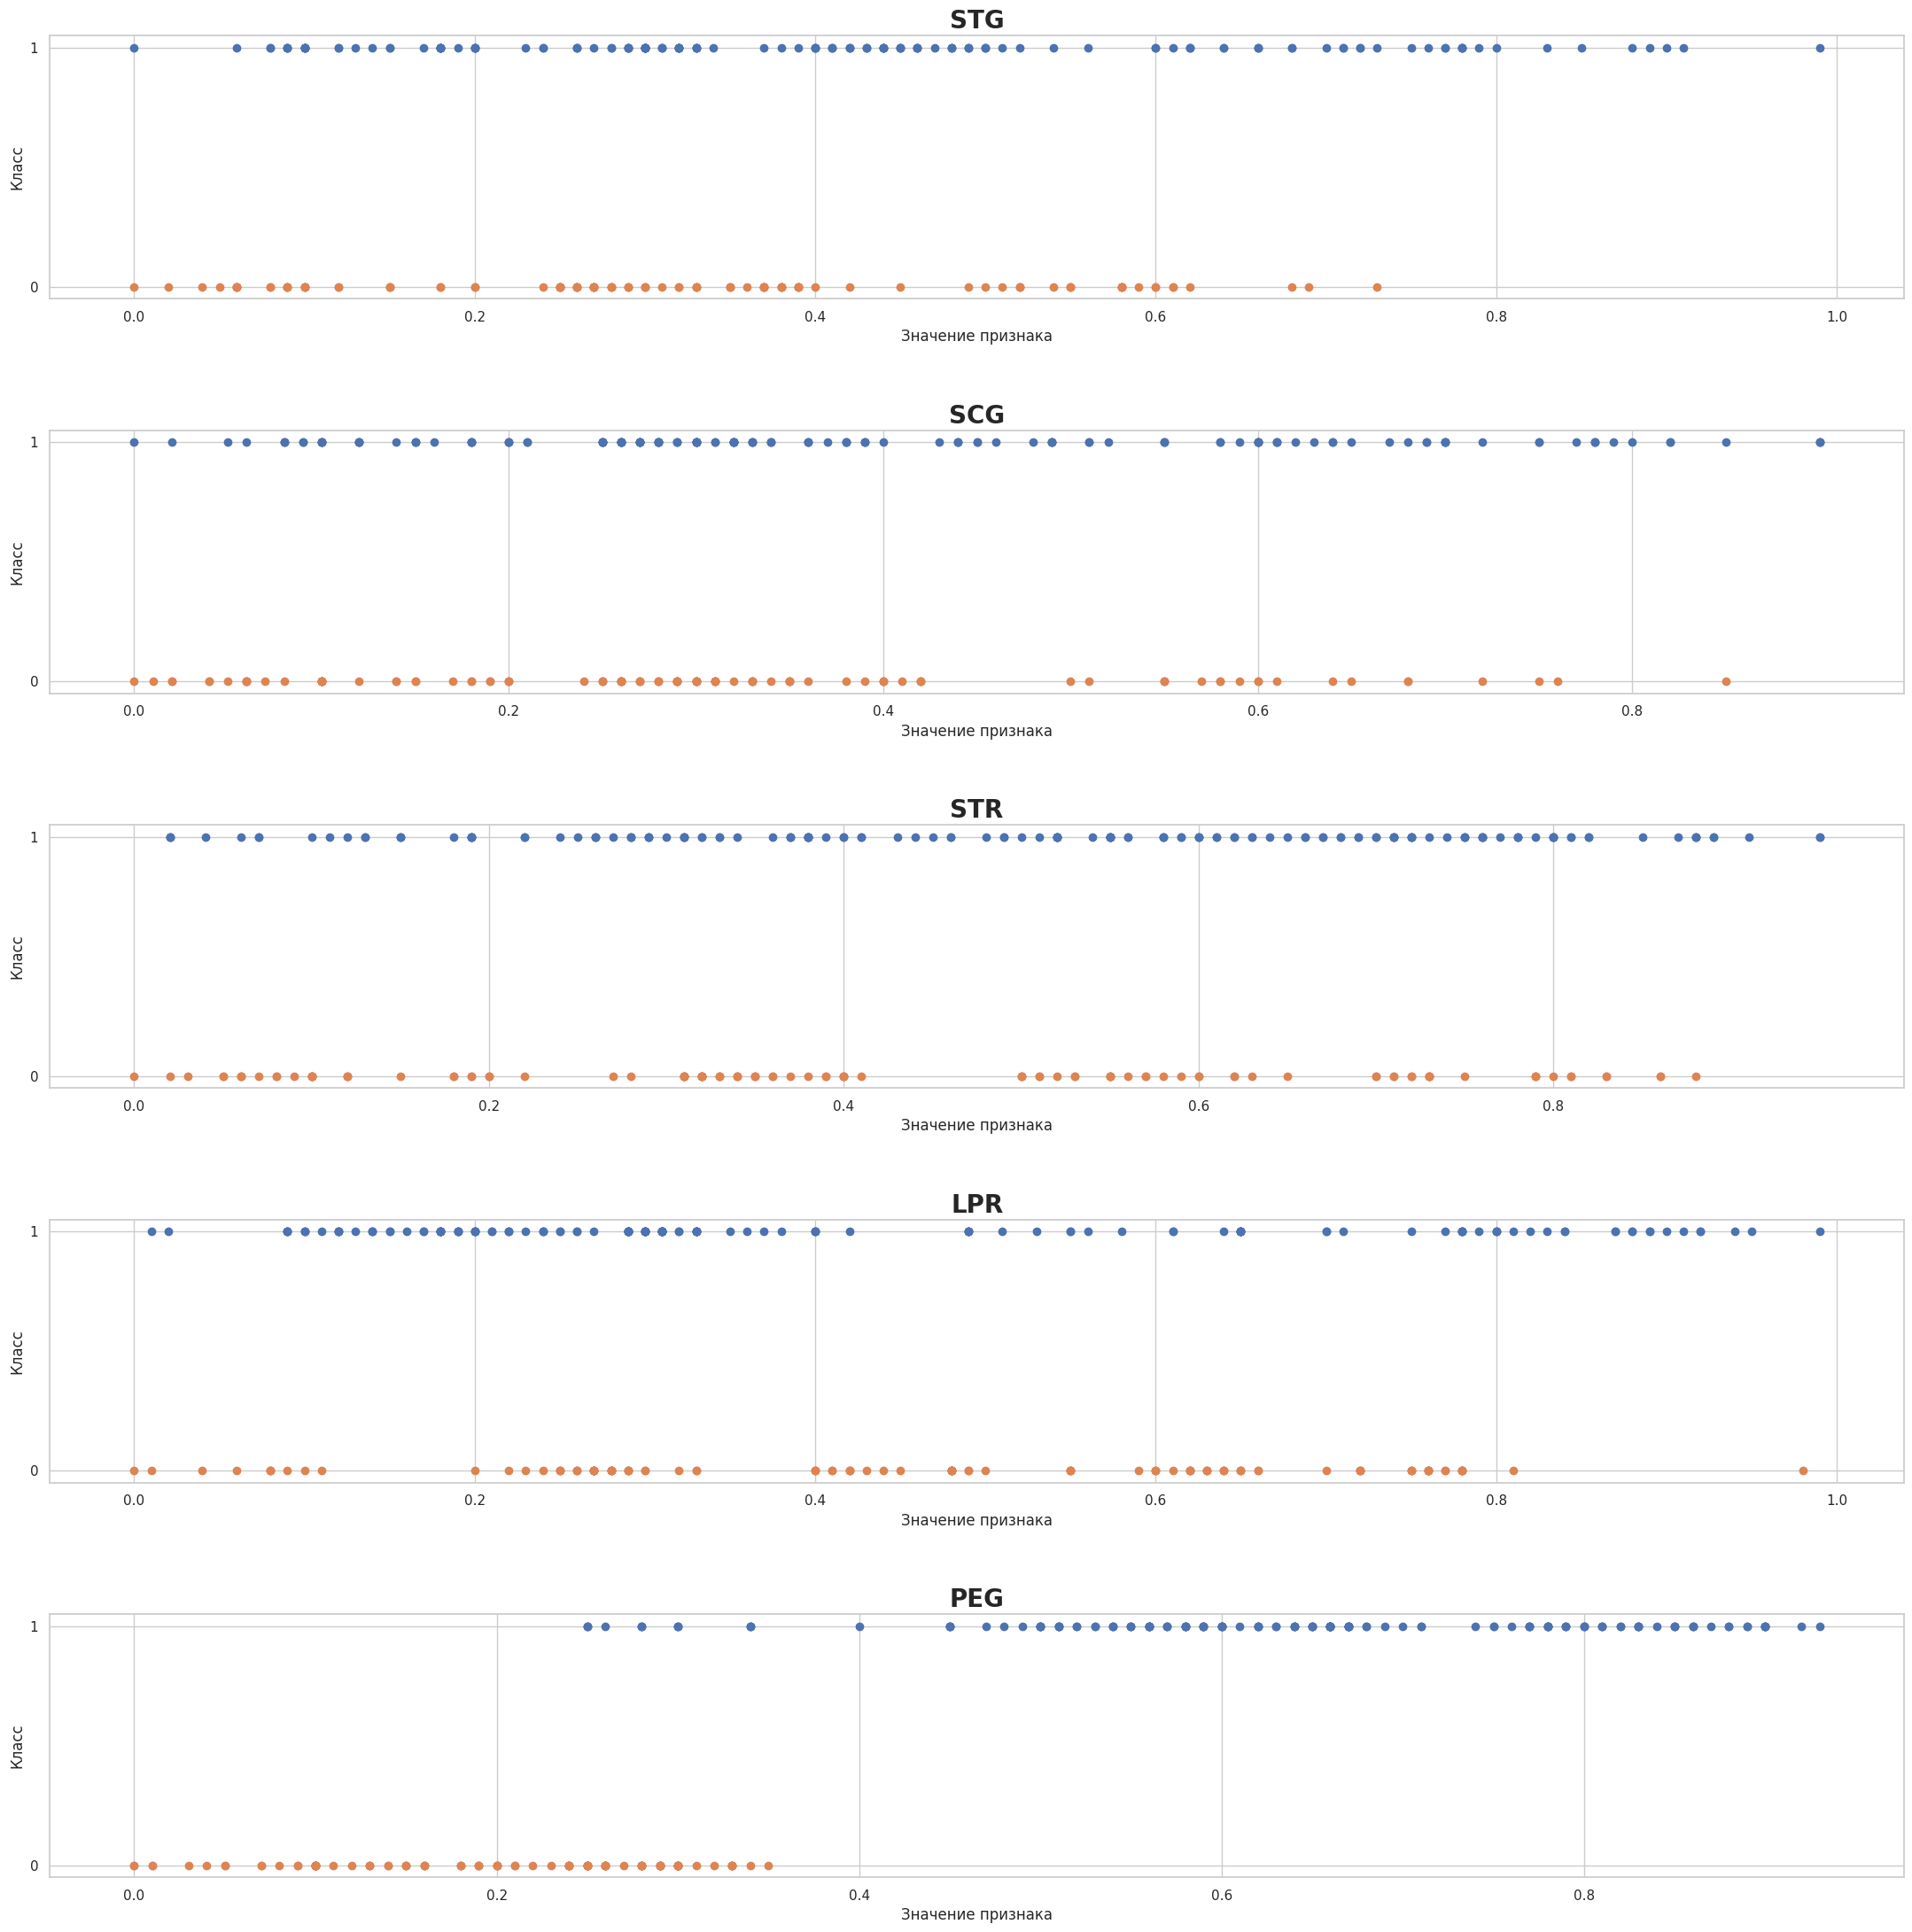

In [95]:
fig, ax = plt.subplots(5, 1, figsize=(27,27))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(fatures):
  ax[i].scatter(X[y == 1][feature], y[y == 1])
  ax[i].scatter(X[y == 0][feature], y[y == 0])

  ax[i].set_title(feature, fontsize=20, weight='bold')
  ax[i].yaxis.set_ticks([0, 1])
  ax[i].set(xlabel='Значение признака', ylabel='Класс')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По признаку `PEG`. По кривой значения джинни видно выпуклость и абсолютное значение максимума больше чем у остальных признаков. По `scatter` видно, что наш результат верный, т.к. по значению `PEG` признака можно хорошо разделить классы.

Хорошие кривые выпуклы (вверх), соответсвенно максимизируя определенными порогами критерий Джини. А "плохие" признаки примерно равны при любых пороговых значениях, то есть разделение по ним практически не влияет на показатели разбиения, что подтверждается `scatter` графиками (классы разбросаны по значениям признака)

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Посылка: https://contest.yandex.ru/contest/56884/run-report/103014697/

Ник: Георгий

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [96]:
from hw5code import DecisionTree

In [97]:
from sklearn.preprocessing import LabelEncoder

!wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/agaricus-lepiota.data

--2023-12-15 20:46:10--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/agaricus-lepiota.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [text/plain]
Saving to: ‘agaricus-lepiota.data.2’

agaricus-lepiota.da 100%[===================>] 364.95K  --.-KB/s    in 0.004s  

2023-12-15 20:46:10 (81.8 MB/s) - ‘agaricus-lepiota.data.2’ saved [373704/373704]



In [98]:
mashroom_cols = [
    'poisonous',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'bruises',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'
]


In [99]:
df = pd.read_csv('agaricus-lepiota.data', sep = ',', names = mashroom_cols)
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [100]:
y = df['poisonous']
X = df.drop('poisonous', axis=1)

In [101]:
encoder = LabelEncoder()

for column in X.columns:
  X[column] = encoder.fit_transform(X[column])

y = encoder.fit_transform(y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = DecisionTree(['categorical'] * X.shape[1])
model.fit(np.array(X_train), np.array(y_train))


print('Accurancy on test:', accuracy_score(model.predict(np.array(X_test)), y_test))

Accurancy on test: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

In [104]:
!wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data

--2023-12-15 20:46:11--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25897 (25K) [text/plain]
Saving to: ‘tic-tac-toe-endgame.csv.2’

tic-tac-toe-endgame 100%[===================>]  25.29K  --.-KB/s    in 0s      

2023-12-15 20:46:11 (114 MB/s) - ‘tic-tac-toe-endgame.csv.2’ saved [25897/25897]

--2023-12-15 20:46:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified


In [105]:
df_car = pd.read_csv("car.data", names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] )
df_nursery = pd.read_csv("nursery.data", names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class'])
df_tic = pd.read_csv("tic-tac-toe-endgame.csv")

In [106]:
df['poisonous'] = df['poisonous'].map({'e':0, 'p':1})
df_car['class']  = df_car['class'].map({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})
df_nursery['class'] = df_nursery['class'].map({'not_recom': 0, 'recommend': 1, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
df_tic['V10'] = df_tic['V10'].map({ 'negative': 0, 'positive': 1})

In [107]:
dataframes = [df, df_car, df_nursery, df_tic]
targets = ['poisonous', 'class', 'class', 'V10']
all_X = []
all_y = []

In [108]:
for current in range(len(dataframes)):
  cur_target = targets[current]

  cur_y = dataframes[current][cur_target]
  cur_X = dataframes[current].drop(cur_target, axis=1)

  encoder = LabelEncoder()
  for column in cur_X.columns:
    cur_X[column] = encoder.fit_transform(cur_X[column])

  cur_y = encoder.fit_transform(cur_y)

  all_X.append(cur_X)
  all_y.append(cur_y)

In [110]:
out = pd.DataFrame(columns=['Real', 'Categorical', 'Ohe', 'Sklearn'], index = list(range(4)))

for i in range(4):
    X = all_X[i]
    y = all_y[i]

    types = ['real'] * X.shape[1]
    accurrancy_real = cross_val_score(DecisionTree(types), X=X.values, y=y,
                               scoring=make_scorer(accuracy_score), cv = 10)
    out.loc[i, 'Real'] = accurrancy_real.mean()

    types = ['categorical']* X.shape[1]
    accurrancy_cat = cross_val_score(DecisionTree(types), X=X.values, y=y,
                              scoring=make_scorer(accuracy_score), cv = 10)
    out.loc[i, 'Categorical'] = accurrancy_cat.mean()

    types = ['real'] * X.shape[1]
    X_ohe = pd.get_dummies(X)
    accurrancy_ohe = cross_val_score(DecisionTree(types), X=X_ohe.values, y=y, scoring=make_scorer(accuracy_score), cv = 10)
    out.loc[i, 'Ohe'] = accurrancy_ohe.mean()

    accurrancy_sklearn = cross_val_score(DecisionTreeClassifier(), X=X.values, y=y,
                                  scoring=make_scorer(accuracy_score), cv = 10)
    out.loc[i, 'Sklearn'] = accurrancy_sklearn.mean()

In [111]:
out

,Real,Categorical,Ohe,Sklearn
0,0.999261,1.0,0.999261,0.961123
1,0.93407,0.953724,0.93407,0.904621
2,1.0,1.0,1.0,1.0
3,0.467533,0.5425,0.467533,0.785241


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** На одном датасете получаем идеальное качество обучения при всех методах, на остальных:

 можем заметить что sklearn дает лучшее качество на 3 датасете

 Categorial дает лучшее качество на 0 и 1 датасетах, т.к. они имеют категориальные признаки.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

; |